In [97]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = "./dataBase/penguins_lter.csv"

pinguim_df = pd.read_csv(file)

In [5]:
pinguim_df.head(3)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN


In [6]:
pinguim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

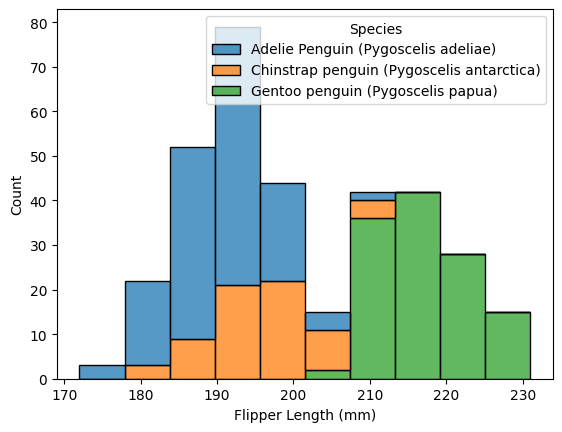

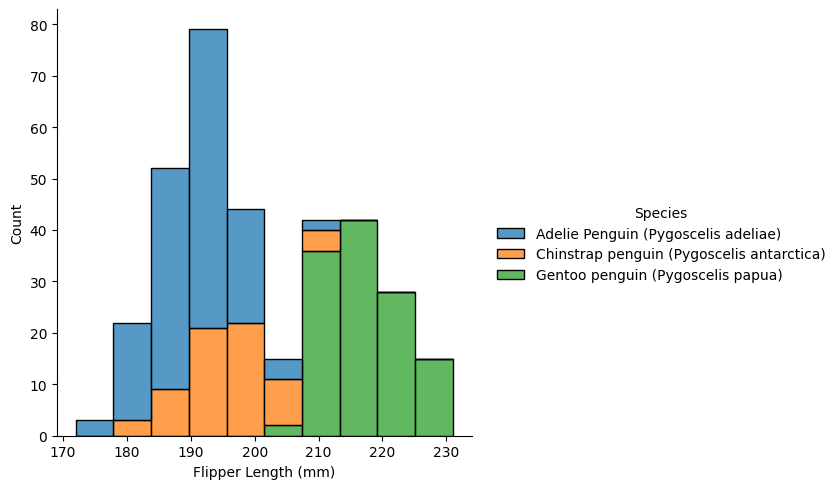

In [29]:
"""HISTOGRAMA"""
sns.histplot(pinguim_df, x = "Flipper Length (mm)", hue = "Species", multiple = "stack")
# sns.displot(pinguim_df, x = "Flipper Length (mm)", hue="Species", multiple="stack")

<Axes: xlabel='Flipper Length (mm)', ylabel='Density'>

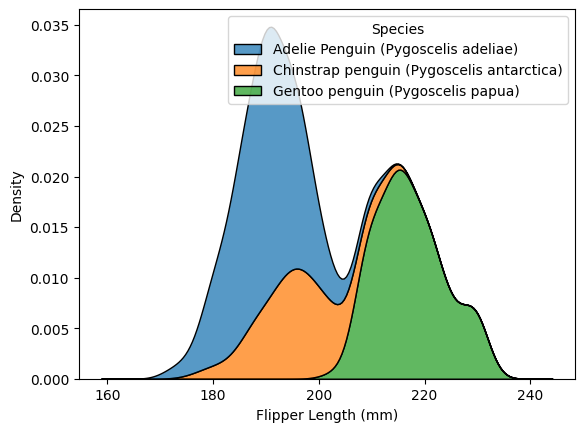

In [27]:
""""KDEPLOT KERNEL DENSITY ESTIMATION"""
sns.kdeplot(pinguim_df, x = "Flipper Length (mm)", hue = "Species", multiple = "stack")
# sns.displot(data=pinguim_df, x="Flipper Length (mm)", hue="Species", multiple="stack", kind="kde")


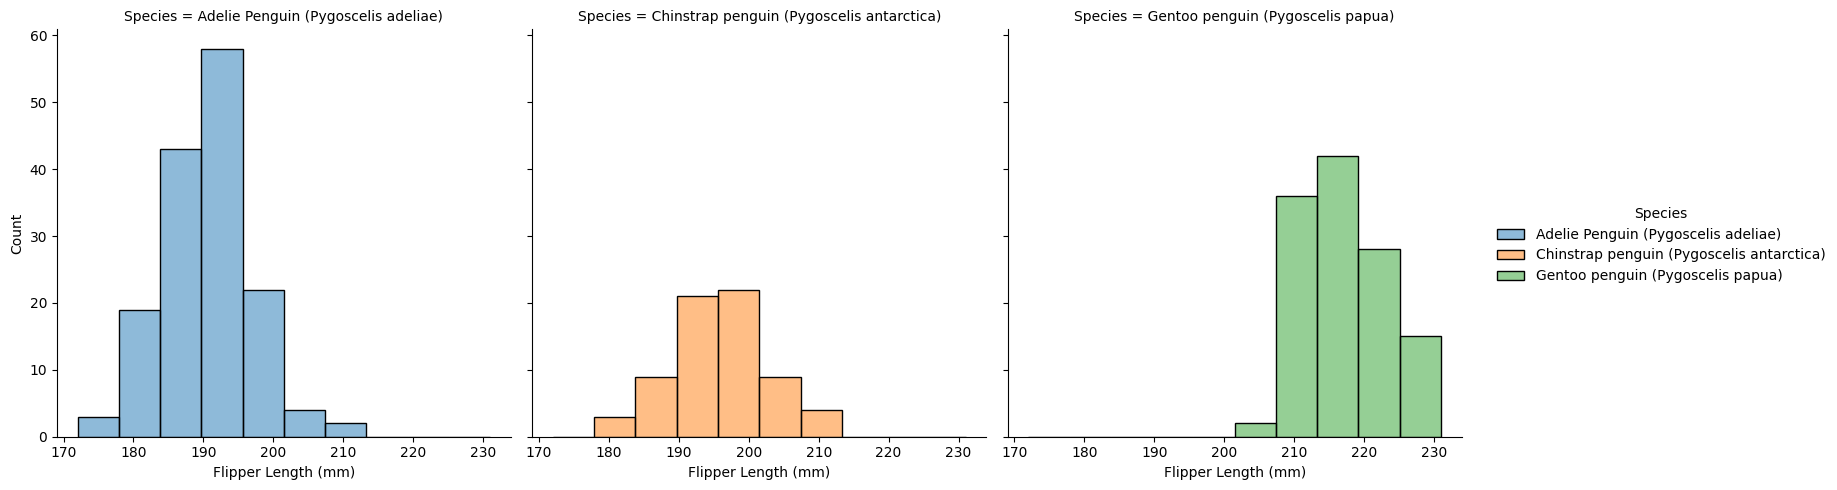

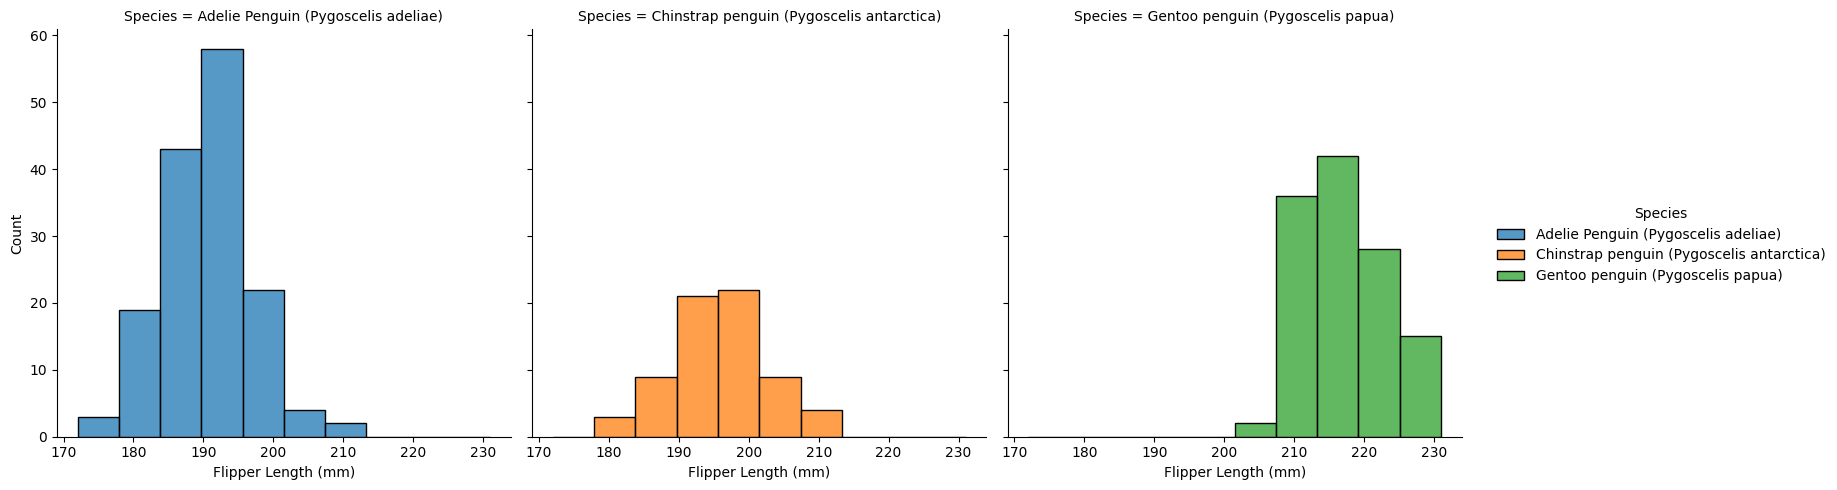

In [36]:
"""FIGURE-LEVELS PODEM FACILMENTE REPRESENTAR VARIOS GRAFICOS"""
sns.displot(pinguim_df, x = "Flipper Length (mm)", hue = "Species", col = "Species")

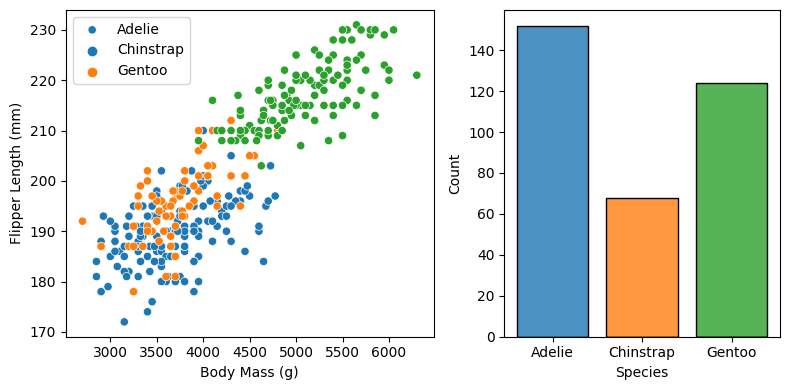

In [50]:
""" CRIANDO UM FIGURE COM 1 LINHA, 2 COLUNAS"""
""" TAMANHO (8,4), PROPORÇÃO 4 pra 3"""
"""
axs[0] PLOTANDO O SCATTERPLOT OU DISPERSÃO
axs[1] PLOTANDO O HISTPLOT OU HISTOGRAMA
"""

pinguimSpecies = ["Adelie","Chinstrap", "Gentoo"]
f, axs = plt.subplots(1,2, figsize = (8,4), gridspec_kw = dict(width_ratios =[4,3]))
scatter = sns.scatterplot(pinguim_df, x = "Body Mass (g)", y = "Flipper Length (mm)", hue = "Species", ax = axs[0])
sns.histplot(pinguim_df, x = "Species", hue = "Species",shrink = .8, alpha = .8, legend = False,ax = axs[1])
axs[1].set_xticks(range(len(pinguimSpecies)))
axs[1].set_xticklabels(pinguimSpecies)

scatter.legend(labels=pinguimSpecies, fontsize = 10)
f.tight_layout()

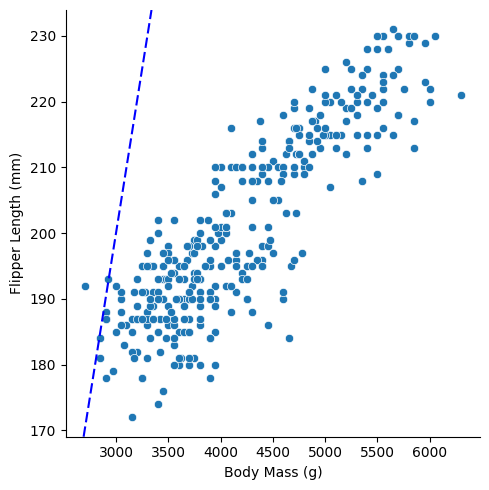

In [74]:
g = sns.relplot(pinguim_df, x = "Body Mass (g)", y = "Flipper Length (mm)")
g.ax.axline(xy1=(3000, 200), slope=.10, color="b", dashes=(5, 2))

['MALE' 'FEMALE' '.']
['MALE' 'FEMALE']


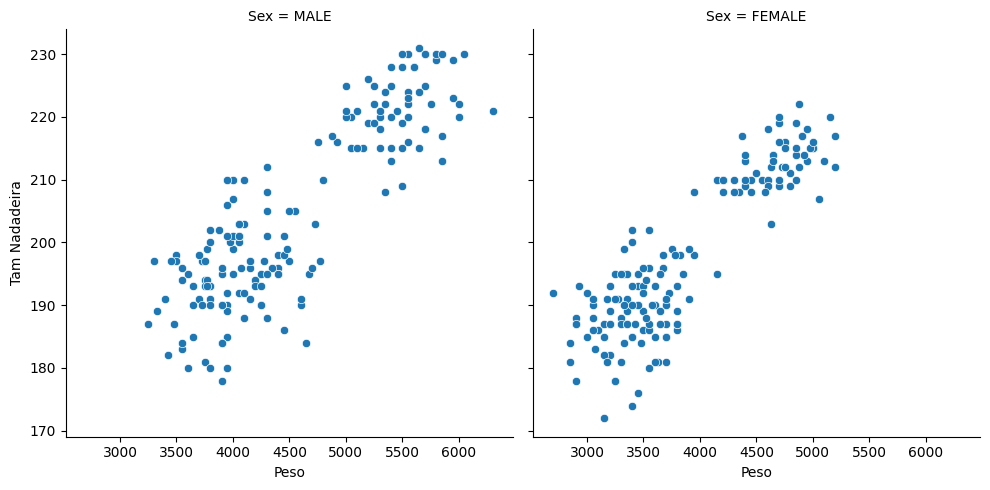

In [107]:
"""Substituindo outliers"""
pinguim_sex_df = pinguim_df[["Body Mass (g)", "Flipper Length (mm)","Sex"]].dropna()
print(pinguim_sex_df["Sex"].unique())
pinguim_sex_df["Sex"] = np.where(pinguim_sex_df["Sex"] == ".","MALE",pinguim_sex_df["Sex"])
print(pinguim_sex_df["Sex"].unique())

# RELPLOT, DISPLOT, CATPLOT
"""Atribundo o grafíco para um variavel para modificações"""
g = sns.relplot(pinguim_sex_df, x = "Body Mass (g)", y = "Flipper Length (mm)", col = "Sex")
g.set_axis_labels("Peso","Tam Nadadeira")

<Axes: >

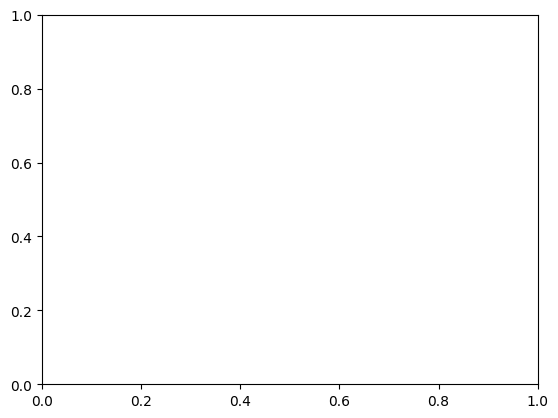

In [110]:
"""Criando Figuras"""
""" PRINCIPAIS DIFERENÇAS ENTRE SUBSPLOT E FACETGRID"""
f,ax = plt.subplots()

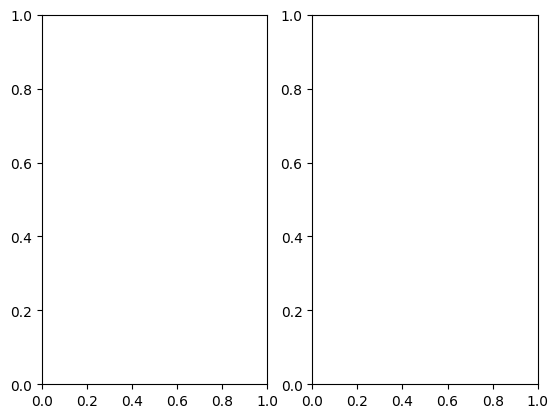

In [113]:
f, ax = plt.subplots(1,2)

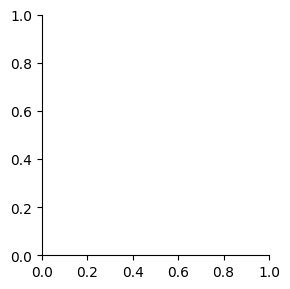

In [116]:
"""FacetGrid como função do seaborn"""
sns.FacetGrid(pinguim_df)

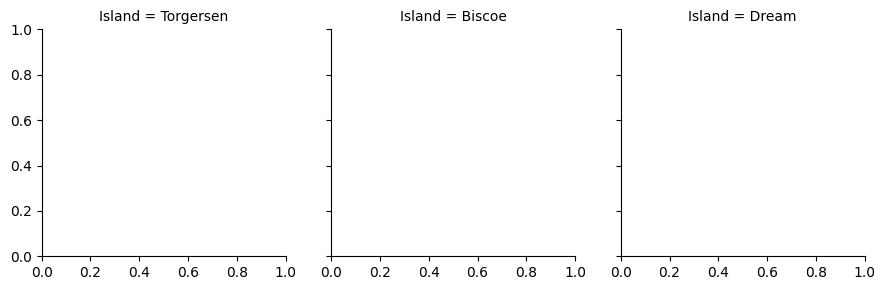

In [119]:
sns.FacetGrid(pinguim_df, col = "Island")

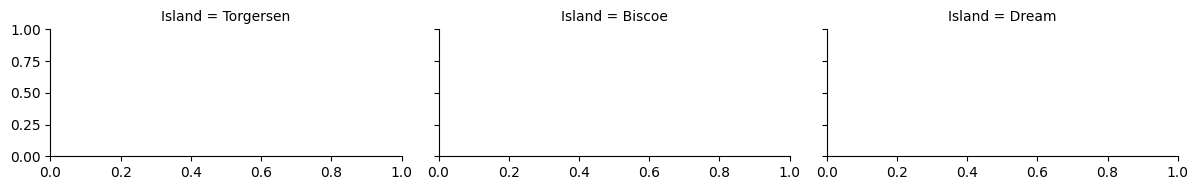

In [129]:
"""ALTURA E LARGURA DE CADA PLOT"""
sns.FacetGrid(pinguim_df, col = "Island", height= 2, aspect=2)

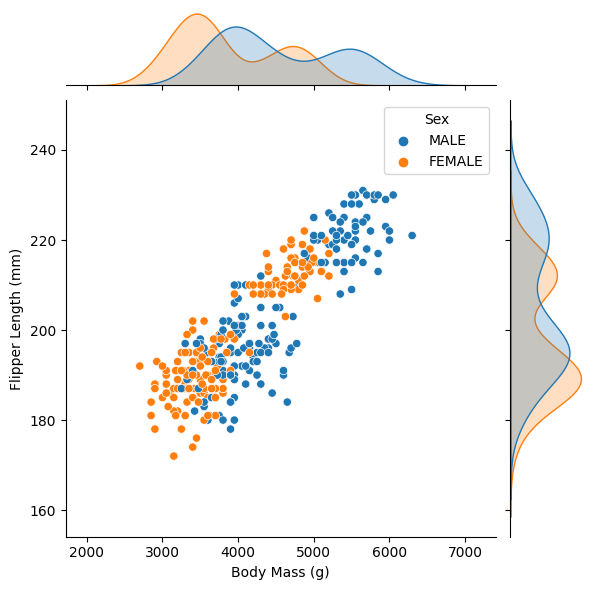

In [132]:
""" NAO SE ENCAIXA NESSE MODELO -> JOINTPLOT E PAIRPLOT"""
"""EXISTE JOINTGRID E PAIRGRID PARA ALTERAR ALGUMAS FUNÇÕES"""
sns.jointplot(pinguim_sex_df, x = "Body Mass (g)", y = "Flipper Length (mm)",hue = "Sex")

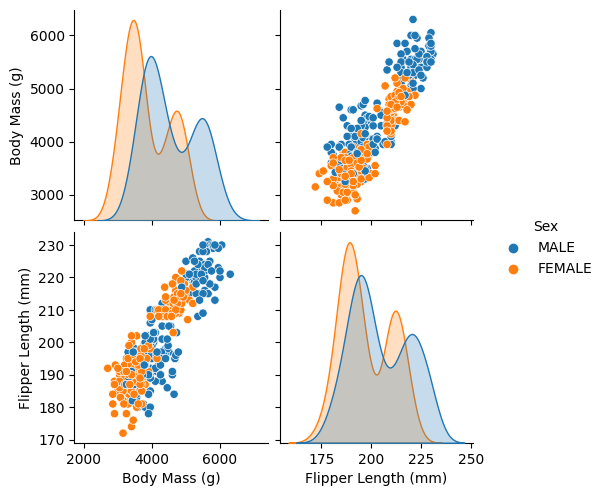

In [135]:
sns.pairplot(pinguim_sex_df, hue = "Sex")

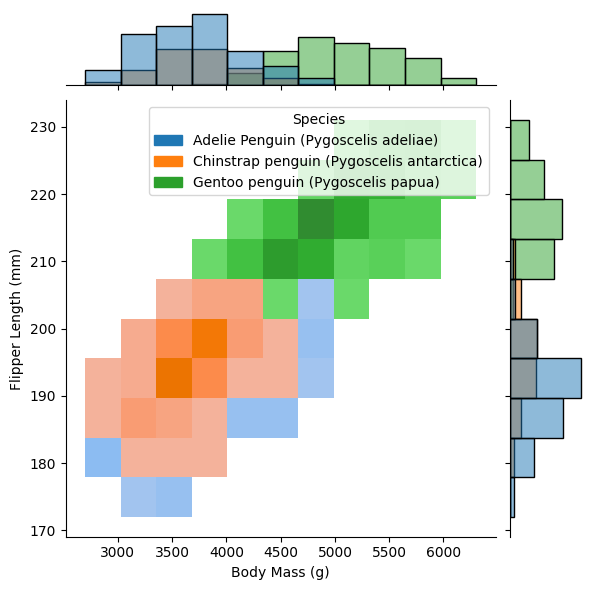

In [139]:
sns.jointplot(pinguim_df, x = "Body Mass (g)", y = "Flipper Length (mm)", hue = "Species", multiple = "stack",kind = "hist", )